In [1]:
import sys
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.legend_handler import HandlerTuple

import phases
import feedstock as fs
import fuel as fu
import energy as en
import gasifier as gs

For species Fe(c), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 4.2881898

For species Fe(c), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 3.425820683333331

For species Fe(c), discontinuity in s/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 8.486560101557188

For species Cr(cr), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  749.1520512400002
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  113.24055562733336
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in s/R detec

In [2]:
ultimate = [45.2, 5.4, 39.0, 0.1, 0, 0]
ash_WB = 0.9/100
moist_WB = 9.4/100
LHV_WB = 16.4 # MJ/kg

ash = ash_WB / (1 - moist_WB)
moist = moist_WB / (1 - moist_WB)
LHV = LHV_WB / (1 - moist_WB)

fuel = fs.create_fuel_stream(1, ultimate, ash, moist, LHV=LHV)
fuel.set_HHV_from_LHV(LHV)

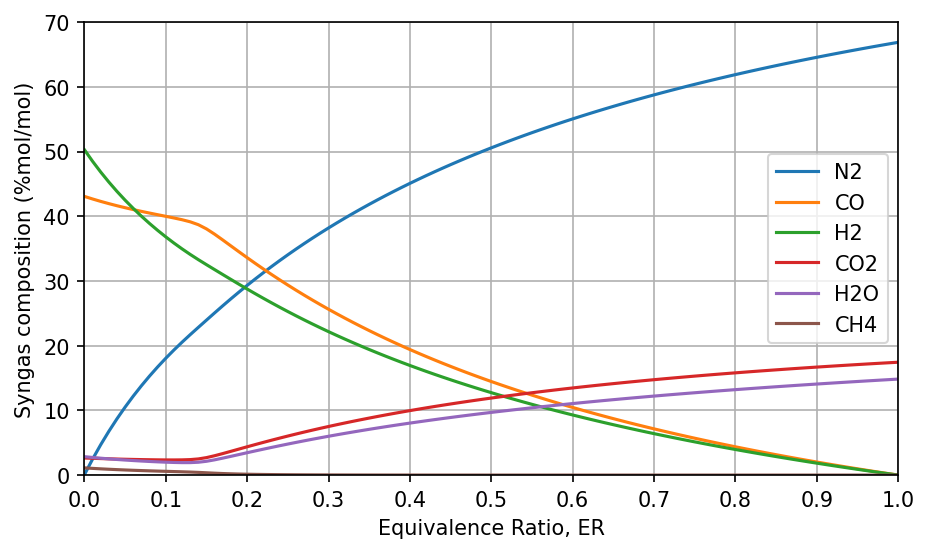

In [3]:
T = 800 + 273.15 # K
P = 1E5 # Pa
ERs = np.arange(0.0, 1.0+1E-6, 0.01)
OUT1 = []

for j, er in enumerate(ERs):
    air = fs.create_air_from_ER(fuel, er)
    outlet1 = gs.gasify_isot(fuel, air, T, P, charFormation=0, directMethaneConv=0)
    OUT1.append(outlet1)

species = ['N2', 'CO', 'H2', 'CO2', 'H2O', 'CH4']
y1 = np.zeros((len(species), len(OUT1)))

for i, sp in enumerate(species):
    composition = [out.get_syngas_fraction(sp, water=True, nitrogen=True) for out in OUT1]
    y1[i] = composition

fig1 = plt.figure(figsize=(7,4), dpi=150)
for i, sp in enumerate(species):
    plt.plot(ERs, 100*y1[i], label=sp)
plt.xlim(0, 1)
plt.ylim(0, 70)
plt.xticks(np.arange(ERs[0], ERs[-1]+1E-6, 0.1))
plt.legend()
plt.xlabel('Equivalence Ratio, ER')
plt.ylabel('Syngas composition (%mol/mol)')
plt.grid()
plt.show()

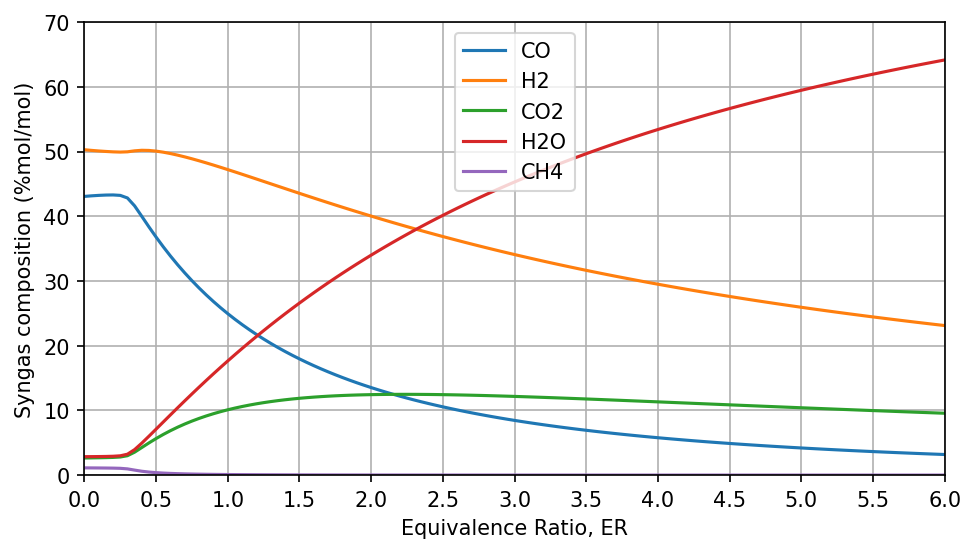

In [5]:
T = 800 + 273.15 # K
P = 1E5 # Pa
SRs = np.arange(0.0, 6.0+1E-6, 0.05)
OUT2 = []

for j, sr in enumerate(SRs):
    steam = fs.create_steam_from_SCR(fuel, sr)
    outlet2 = gs.gasify_isot(fuel, steam, T, P, charFormation=0, directMethaneConv=0)
    OUT2.append(outlet2)

species = ['CO', 'H2', 'CO2', 'H2O', 'CH4']
y2 = np.zeros((len(species), len(OUT2)))

for i, sp in enumerate(species):
    composition = [out.get_syngas_fraction(sp, water=True, nitrogen=True) for out in OUT2]
    y2[i] = composition

fig1 = plt.figure(figsize=(7.4,4), dpi=150)
for i, sp in enumerate(species):
    plt.plot(SRs, 100*y2[i], label=sp)
plt.xlim(0, 1)
plt.ylim(0, 70)
plt.xticks(np.arange(SRs[0], SRs[-1]+1E-6, 0.5))
plt.legend()
plt.xlabel('Equivalence Ratio, ER')
plt.ylabel('Syngas composition (%mol/mol)')
plt.grid()
plt.show()